In [16]:
%matplotlib notebook
import matplotlib
backend_ =  matplotlib.get_backend() 
import matplotlib.pyplot as plt
import allesfitter
from allesfitter.io import read_csv
from allesfitter.plotting import tessplot
from allesfitter.lightcurves import tessclean
from allesfitter.detection.transit_search import tls_search

Let's load a TESS example light curve:

In [13]:
time, flux, flux_err = read_csv('tess.csv');

Let's plot it and have a look.

The handy tessplot function automatically seperates the data into its TESS observing sectors.

<IPython.core.display.Javascript object>


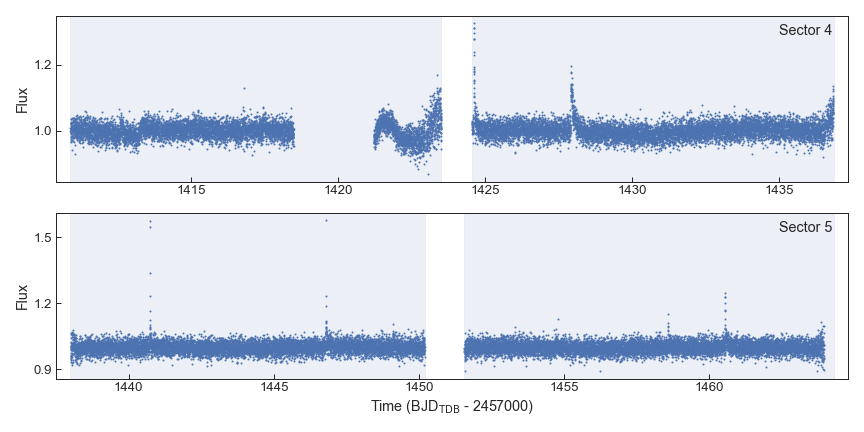

In [14]:
tessplot(time, flux);

Uff, quite some noise! 

Let's clean it and look at the plots.

This will first clip outliers like flares and then run a detrending.

If we pass plot=True, it will also create us three plots:
- the original TESS light curve
- the clipped light curve
- the clipped and detrended light curve

It will also return the cleaned light curve (and the figures if we pass plot=True).

<IPython.core.display.Javascript object>


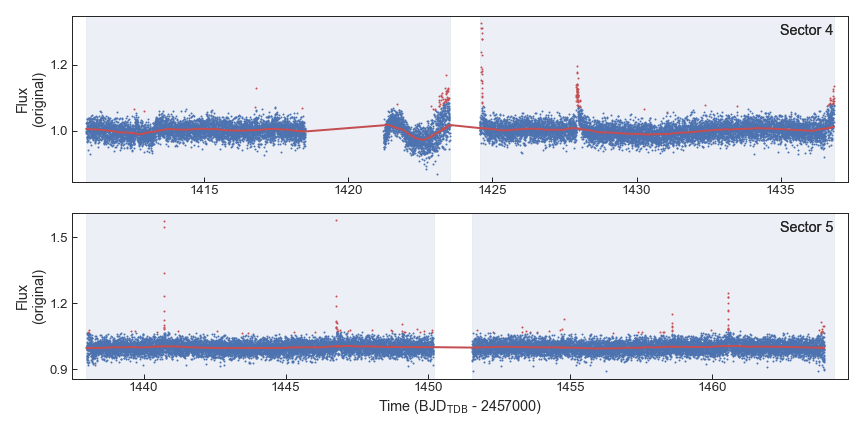

<IPython.core.display.Javascript object>


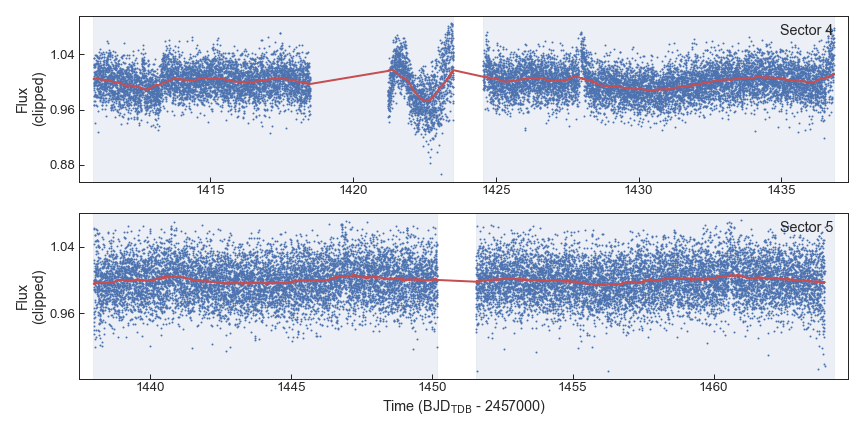

<IPython.core.display.Javascript object>


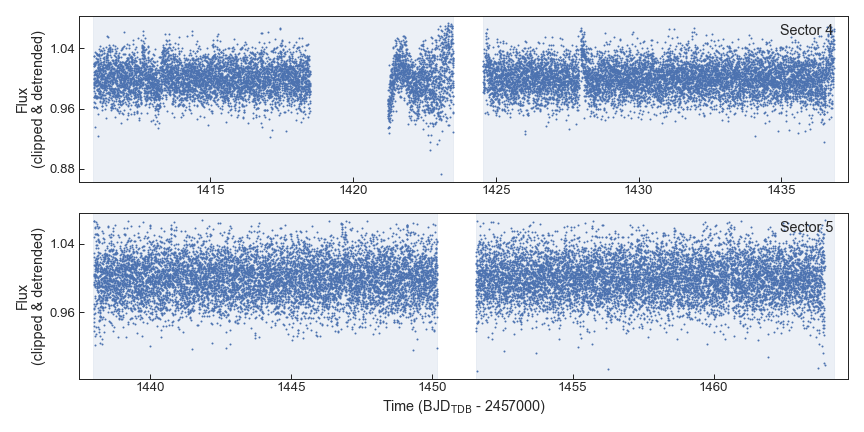

In [21]:
flux_clean, fig1, fig2, fig3 = tessclean(time, flux, plot=True);

This is already better, but a few features are still prominent. 

Luckily, we can fine-tune things a bit more.

For this, we can leverage the wotan package, with a sliding biweight filter over 0.5 days.

We can additional mask out some "bad data" regions.

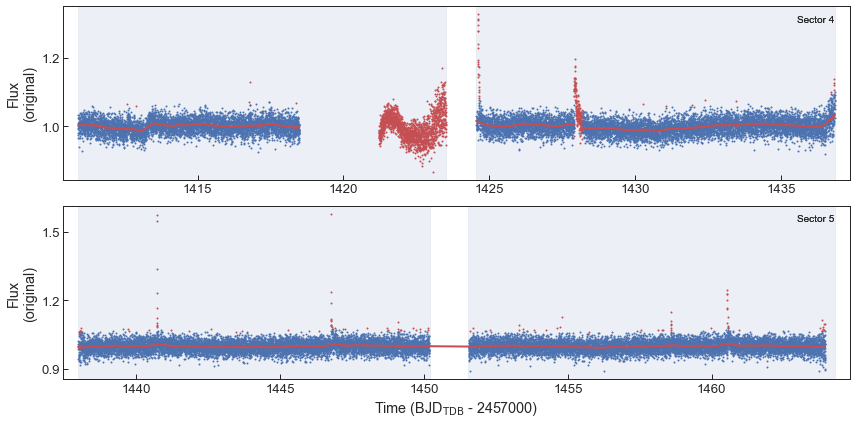

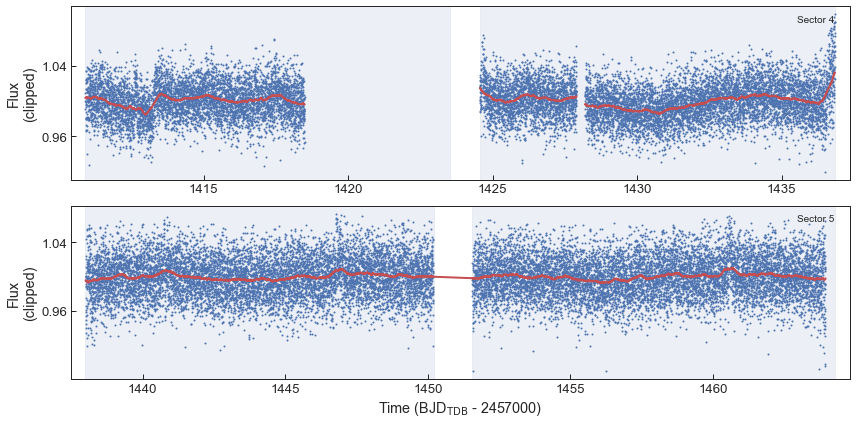

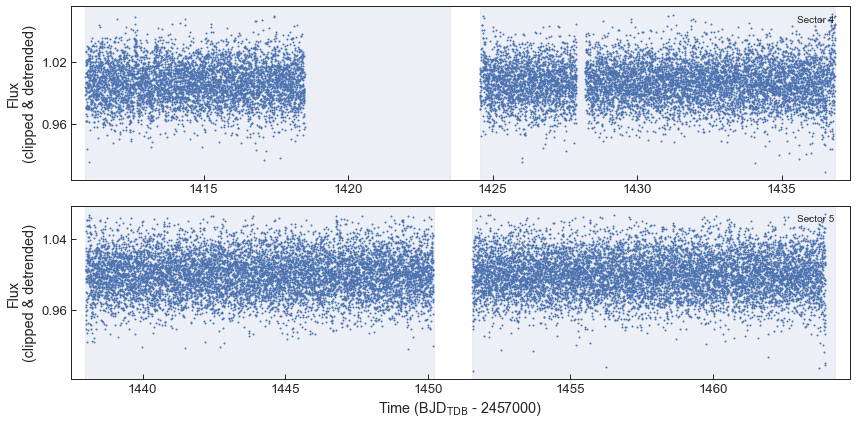

In [6]:
flux_clean, fig1, fig2, fig3 = tessclean(time, flux, plot=True, 
                                         method='biweight', window_length=0.5, 
                                         bad_regions=[(2458420,2458424), (2458427.9,2458428.2)])

Nice, much cleaner! 

Let's use the clean light curve and look for a transit... in another tutorial :)